# Download data

Data available via scikit-learn

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
##### clustering (unsupervised/descrete) ####
# radmon generated data  
# Generating 3 destinct cluster, 2 of them slightly overlapping
X = -2 * np.random.rand(50,2)
X1 = 1 + 2 * np.random.rand(50,2)
X2 = 0.4 + np.random.rand(50,2)

X = np.append(X,X1,axis=0)
X = np.append(X,X2,axis=0)
colors = [0]*50+[1]*50+[2]*50
# === PLOTTING DATA
# print(X.shape)
# plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = colors)
# plt.show()
# ===

# gene expression
nci60 = pd.read_csv('data/NCI60.txt',sep='\t', index_col=False)
# print(nci60.shape)
#display(nci60)
### pre-process
print(nci60.shape)
# expression data starts at column 5
expr = nci60.iloc[:,5:]
print(expr.shape)


##### dimensionality reduction (unuspervised/continuous) #####
#https://idyll.pub/post/dimensionality-reduction-293e465c2a3443e8941b016d/
#gene expression

(198, 389)
(198, 384)


# K-Means

## K-means synthenic data

[[ 0.90633277  0.95708577]
 [-1.01676617 -1.16647189]
 [ 2.03997763  2.15325056]]


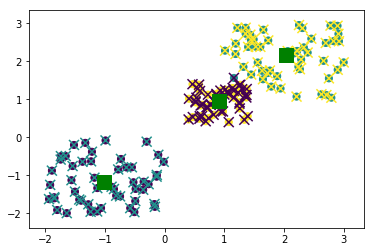

In [29]:
#Synthetic data
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

print(Kmean.cluster_centers_)

# Plots original points
plt.scatter(X[ : , 0], X[ : , 1], s = 50, c=colors)
# Plots X labels after k-mens
plt.scatter(X[ : , 0], X[ : , 1], s = 100, marker='x', c=Kmean.labels_)

# Plots centroids
for cl in Kmean.cluster_centers_:
    plt.scatter(cl[0], cl[1], s=200, c='g', marker='s')
plt.show()


### Elbow method for determing K

https://pythonprogramminglanguage.com/kmeans-elbow-method/

In [ ]:
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    # calcualtes the distance between each point and each cluster center
    # takes the minimum of each calcaulation (hence the difference between point and ITS cluster center)
    # takes average of all distances
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means on Gene Expression data

3     46
8     25
11    21
14    18
1     18
10    15
6     12
2      8
15     6
13     6
4      6
9      4
7      4
0      4
5      3
12     2
dtype: int64
cancer_melanoma               26
cancer_non-small cell lung    26
cancer_renal                  23
cancer_colon                  21
cancer_ovarian                21
cancer_leukemia               18
cancer_CNS                    18
cancer_breast                 15
normal_brain                   8
cancer_prostate                6
normal_blood                   6
normal_skin                    2
normal_kidney                  2
normal_ovary                   2
normal_lung                    2
normal_prostate                2
Name: batch, dtype: int64


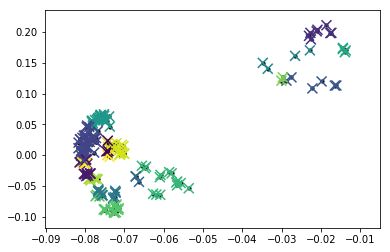

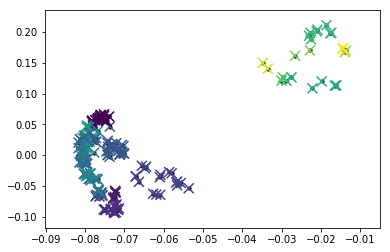

In [31]:
# fit the data, there is 9 tissue types
Kmean = KMeans(n_clusters=16)
Kmean.fit(expr)
# see how many rows ended up with each labels
print(pd.Series(Kmean.labels_).value_counts())
print(nci60.batch.value_counts())

# # how we do visulaize this?

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=Kmean.labels_)
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=nci60.batch.astype('category').cat.codes)
plt.show()

# Hierarchical Clustering

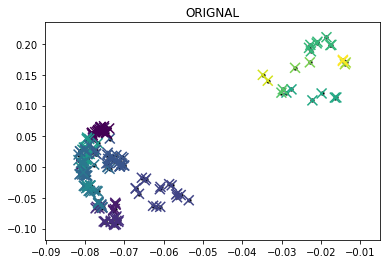

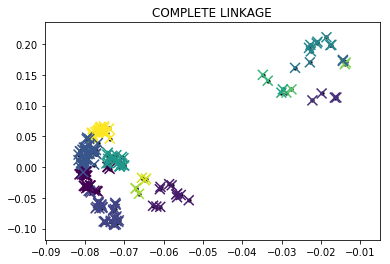

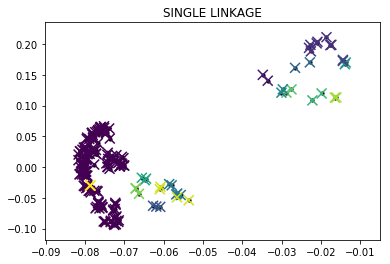

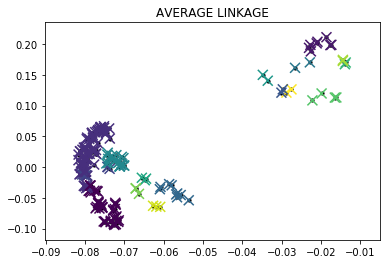

In [33]:
from sklearn.cluster import AgglomerativeClustering
single = AgglomerativeClustering(n_clusters=16, linkage='single').fit(expr)
complete = AgglomerativeClustering(n_clusters=16, linkage='complete').fit(expr)
average = AgglomerativeClustering(n_clusters=16, linkage='average').fit(expr)


plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=nci60.batch.astype('category').cat.codes)
plt.title("ORIGNAL")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=complete.labels_)
plt.title("COMPLETE LINKAGE")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=single.labels_)
plt.title("SINGLE LINKAGE")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=average.labels_)
plt.title("AVERAGE LINKAGE")
plt.show()


# ON YOU OWN - Explore for synthetic data set (comment nci60 plots and uncomment the ones below)

# #### SYNTHETIC DATA ####
# plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = colors)
# plt.title("ORIGNAL")
# plt.show()

# plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = single.labels_)
# plt.title("COMPLETE LINKAGE")
# plt.show()

# plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = single.labels_)
# plt.title("SINGLE LINKAGE")
# plt.show()

# plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = single.labels_)
# plt.title("AVERAGE LINKAGE")
# plt.show()



### Hierarchical Clustering with Scipy

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# cannot choose number of clusters
Z = linkage(expr,'complete')
plt.figure(figsize=(21, 7))  
dendrogram(Z,orientation='top',
            labels=nci60.tissue,
            distance_sort='descending',
            leaf_font_size='11',
            show_leaf_counts=True) 
plt.show()

# Z = linkage(X,'complete')
# plt.figure(figsize=(21, 7))  
# dendrogram(Z,orientation='top',
#             labels=colors,
#             distance_sort='descending',
#             leaf_font_size='11',
#             show_leaf_counts=True) 
# plt.show()

## Bi-Clustering for Omics data

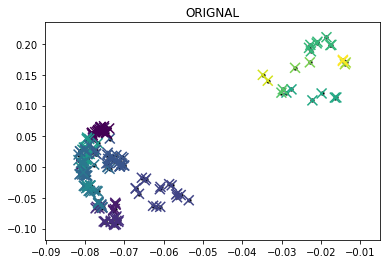

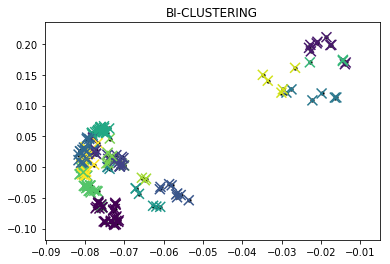

In [34]:
from sklearn.cluster import SpectralBiclustering
bicluster = SpectralBiclustering(n_clusters=16, random_state=0).fit(expr)

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=nci60.batch.astype('category').cat.codes)
plt.title("ORIGNAL")
plt.show()

plt.scatter(nci60.PC2, nci60.PC3, s = 10, c='black')
plt.scatter(nci60.PC2, nci60.PC3, s = 100, marker='x', c=bicluster.row_labels_)
plt.title("BI-CLUSTERING")
plt.show()


## Lab

Try unsupervised learning on the synthetic dataset in Orange

Use code below for the python data widget

![alt text](kmeans.png "Workflow")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Orange.data import Domain, Table
##### clustering (unsupervised/descrete) ####
# radmon generated data  
# Generating 3 destinct cluster, 2 of them slightly overlapping
X = -2 * np.random.rand(50,2)
X1 = 1 + 2 * np.random.rand(50,2)
X2 = 0.4 + np.random.rand(50,2)

X = np.append(X,X1,ax![alt text](kmeans.png "Workflow")is=0)
X = np.append(X,X2,axis=0)
colors = [0]*50+[1]*50+[2]*50
dfX = pd.DataFrame(X)
dfX['color'] = colors

out_data = Table(dfX)